# Analysis of Air Quality in New York City
By: Mahinsa Bambarende

## Introduction
Air quality refers to the level of pollutants present in the air, which can come from a variety of sources including transportation, industry, and natural sources such as wildfires. Poor air quality can have serious health consequences, particularly for vulnerable populations such as children, the elderly, and those with pre-existing respiratory conditions. It can also lead to environmental damage, such as acid rain and climate change. By monitoring and improving air quality, we can help to protect both human health and the environment, and create a more sustainable future for all.

Air quality is a critical issue that affects the health of residents in urban areas such as New York City. Pollution from traffic, industry, and other sources can have serious health consequences, making it crucial to analyze air quality data to understand the extent of the problem and identify potential solutions.

In this tutorial, we will use Python and various libraries to collect, process, and analyze air quality data for NYC. By exploring the data using visualization techniques and statistical analysis, we aim to identify trends and patterns of air quality in the city.

The ultimate goal of our analysis is to draw conclusions and provide reasoning for improving air quality in NYC. Policymakers can use our findings to develop targeted interventions that reduce pollution and improve public health. As individuals, analyzing air quality data can raise awareness and encourage people to take action to reduce their own contribution to pollution through sustainable practices like using public transportation or reducing energy consumption.

Throughout this tutorial, we will follow the Data Science Lifecycle:

1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data Visualization
4. Model: Analysis, Hypothesis Testing, & ML
5. Interpretation: Insight & Policy Decision

By the end of this tutorial, you will have a better understanding of how to use data analysis techniques to address real-world environmental challenges and make informed policy decisions.

## Data Collection
The first step in our analysis of air quality in NYC is data collection. To conduct a thorough analysis, we need reliable and comprehensive data on air quality in the city. In this stage, we will identify data sources, gather data, and prepare it for analysis.

There are several data sources available for air quality data in NYC, including the Environmental Protection Agency (EPA) and the New York State Department of Environmental Conservation (DEC). These organizations provide data on various air pollutants such as sulfur dioxide, ozone, nitrogen dioxide, and particulate matter, among others.

We will be using the NYC Environment and Health Data Portal as our primary data source and can be obtained here: https://catalog.data.gov/dataset/air-quality

The dataset contains a lot of information regarding sources of air pollution, health effects, and overall levels in the city from 2009-2020.

But before that, to start here are all the libraries going to be used in this tutorial. Talk about pandas and numpy more...

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.svm import SVC
from scipy.stats import norm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import folium
import datetime
import seaborn as sns

Our first step is to import our air quality data. We do this by using the pandas function read_csv which takes in the data from the csv file and places it in a dataframe.
Notice how all the important data like hospitalizations and greenhouse gas emissions are clumped into one table, making it hard to understand what the data is conveying. This is where the data processing step is introduced to help clean the data to become more useful in our analysis.

In [298]:
data = pd.read_csv("Air_Quality.csv")
data

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,216498,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2013,06/01/2013,34.64,NaN
1,216499,386,Ozone (O3),Mean,ppb,CD,313,Coney Island (CD13),Summer 2014,06/01/2014,33.22,NaN
2,219969,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2013,06/01/2013,31.25,NaN
3,219970,386,Ozone (O3),Mean,ppb,Borough,1,Bronx,Summer 2014,06/01/2014,31.15,NaN
4,164876,383,Sulfur Dioxide (SO2),Mean,ppb,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,12/01/2008,5.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16117,671118,386,Ozone (O3),Mean,ppb,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,06/01/2020,28.70,NaN
16118,671119,386,Ozone (O3),Mean,ppb,CD,305,East New York and Starrett City (CD5),Summer 2020,06/01/2020,29.56,NaN
16119,671120,386,Ozone (O3),Mean,ppb,CD,304,Bushwick (CD4),Summer 2020,06/01/2020,29.65,NaN
16120,671121,386,Ozone (O3),Mean,ppb,CD,303,Bedford Stuyvesant (CD3),Summer 2020,06/01/2020,29.28,NaN


In addition we are going to be using a map later on for visualization so lets load the data for that too. This dataframe contains all boroughs, neigborhoods, and their coordinates which can help when we get to the visualization step. You can obtain the data through: https://github.com/nychealth/EHDP-data/blob/production/geography/GeoLookup.csv

In [4]:
map = pd.read_csv("GeoLookup.csv")
map.head()

,GeoType,GeoTypeDesc,GeoTypeShortDesc,GeoID,Name,BoroID,Borough,Lat,Long
0,Citywide,Citywide,Citywide,1,New York City,NaN,NaN,NaN,NaN
1,Borough,Borough,Borough,1,Bronx,1.0,Bronx,40.8526,-73.8665
2,Borough,Borough,Borough,2,Brooklyn,2.0,Brooklyn,40.6447,-73.9479
3,Borough,Borough,Borough,3,Manhattan,3.0,Manhattan,40.7772,-73.9672
4,Borough,Borough,Borough,4,Queens,4.0,Queens,40.7076,-73.8185


## Data Processing
Once we have collected the air quality data for NYC, the next step is to process the data to make it ready for analysis. Data processing involves a series of tasks to clean, transform, and aggregate the raw data into a more usable format. By performing these data processing tasks, we can ensure that our data is consistent, complete, and in a format that is suitable for analysis. This will help us to gain insights into the factors affecting air quality in NYC and develop strategies for improving it.

To start this step, let's begin by cleaning and seperating the data to become more useful for us. Let's drop the message column as it seems to be empty throughout. Instead of having the start date, let's change that column to show the year that this data is reflecting. 

Additionally, let's list all the unique names in the Name table to help determine how we are cleaning the data.

In [299]:
data = data.drop(['Message'], axis=1)
data['Start_Date'] = pd.to_datetime(data['Start_Date'], format='%m/%d/%Y')
data['Year'] = data['Start_Date'].dt.year

# Fixes one of dates as the start of 2016 begins on the last day of 2015
x = datetime.datetime(2015, 12, 31).date()
data.loc[data['Start_Date'].dt.date == x, 'Year'] = 2016
data = data.drop(['Start_Date'], axis=1)
names = data.Name.unique()
names

array(['Ozone (O3)', 'Sulfur Dioxide (SO2)', 'PM2.5-Attributable Deaths',
       'Boiler Emissions- Total SO2 Emissions',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Air Toxics Concentrations- Average Benzene Concentrations',
       'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       'PM2.5-Attributable Asthma Emergency Department Visits',
       'PM2.5-Attributable Respiratory Hospitalizations (Adults 20 Yrs and Older)',
       'PM2.5-Attributable Cardiovascular Hospitalizations (Adults 40 Yrs and Older)',
       'Traffic Density- Annual Vehicle Miles Traveled',
       'O3-Attributable Cardiac and Respiratory Deaths',
       'O3-Attributable Asthma Emergency Department Visits',
       'O3-Attributable Asthma Hospitalizations',
       'Traffic Density- Annual Vehicle Miles Traveled for Cars',
       'Traffic Density- Annual Vehicle Miles Traveled for Trucks',
       'Nitrogen Dioxide (NO2)', 'Fine Partic

Now we can see how we might split the data to seperate tables. Notice how all of this information is clumped into one table. It's best if we sepearte them and set them to become useful. Let's first get the data for each type of pollutant. To begin first set a table for mean Ozone levels in NYC. 

Let's also drop some of the columns as they hold unnecessary information like Measure, Measure Info, and Indicator ID. This is because they are the same throughout what we are seperating.

We'll also use some of the map data to set the lattitutdes and longitudes for easier visualization.

In [300]:
O3 = data[data['Name'] == 'Ozone (O3)']
O3 = O3.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name'], axis=1)
O3['Lat'] = np.nan
O3['Long'] = np.nan

for i, row  in map.iterrows():
    O3['Lat'] = np.where(O3['Geo Join ID'] == row['GeoID'], row['Lat'], O3['Lat'])
    O3['Long'] = np.where(O3['Geo Join ID'] == row['GeoID'], row['Long'], O3['Long'])
O3 = O3.reset_index(drop=True)
O3

,Unique ID,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Lat,Long
0,216498,CD,313,Coney Island (CD13),Summer 2013,34.64,2013,40.5806,-73.9821
1,216499,CD,313,Coney Island (CD13),Summer 2014,33.22,2014,40.5806,-73.9821
2,219969,Borough,1,Bronx,Summer 2013,31.25,2013,40.8092,-73.8991
3,219970,Borough,1,Bronx,Summer 2014,31.15,2014,40.8092,-73.8991
4,219971,Borough,2,Brooklyn,Summer 2009,26.27,2009,40.8454,-73.8876
...,...,...,...,...,...,...,...,...,...
1687,671118,CD,306,Park Slope and Carroll Gardens (CD6),Summer 2020,28.70,2020,40.6764,-73.9945
1688,671119,CD,305,East New York and Starrett City (CD5),Summer 2020,29.56,2020,40.6685,-73.8797
1689,671120,CD,304,Bushwick (CD4),Summer 2020,29.65,2020,40.6945,-73.9168
1690,671121,CD,303,Bedford Stuyvesant (CD3),Summer 2020,29.28,2020,40.6877,-73.9406


Then Sulfur Dioxide

In [301]:
SO2 = data[data['Name'] == 'Sulfur Dioxide (SO2)']
SO2 = SO2.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name'], axis=1)
SO2['Lat'] = np.nan
SO2['Long'] = np.nan

for i, row  in map.iterrows():
    SO2['Lat'] = np.where(SO2['Geo Join ID'] == row['GeoID'], row['Lat'], SO2['Lat'])
    SO2['Long'] = np.where(SO2['Geo Join ID'] == row['GeoID'], row['Long'], SO2['Long'])
SO2 = SO2.reset_index(drop=True)
SO2

,Unique ID,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Lat,Long
0,164876,CD,211,Morris Park and Bronxdale (CD11),Winter 2008-09,5.89,2008,40.8561,-73.8528
1,164877,CD,212,Williamsbridge and Baychester (CD12),Winter 2008-09,5.75,2008,40.8863,-73.8515
2,164878,CD,301,Greenpoint and Williamsburg (CD1),Winter 2008-09,4.33,2008,40.7168,-73.9472
3,164879,CD,302,Fort Greene and Brooklyn Heights (CD2),Winter 2008-09,4.41,2008,40.6935,-73.9787
4,164880,CD,303,Bedford Stuyvesant (CD3),Winter 2008-09,4.73,2008,40.6877,-73.9406
...,...,...,...,...,...,...,...,...,...
1123,405357,CD,413,Queens Village (CD13),Winter 2015-16,0.26,2015,40.6996,-73.7373
1124,405358,CD,414,Rockaway and Broad Channel (CD14),Winter 2015-16,0.20,2015,40.5891,-73.8103
1125,405359,CD,501,St. George and Stapleton (CD1),Winter 2015-16,0.13,2015,40.8427,-73.9003
1126,405360,CD,502,South Beach and Willowbrook (CD2),Winter 2015-16,0.12,2015,40.8132,-73.8881


Nitrogen Dioxide

In [302]:
NO2 = data[data['Name'] == 'Nitrogen Dioxide (NO2)']
NO2 = NO2.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name'], axis=1)
NO2['Lat'] = np.nan
NO2['Long'] = np.nan

for i, row  in map.iterrows():
    NO2['Lat'] = np.where(NO2['Geo Join ID'] == row['GeoID'], row['Lat'], NO2['Lat'])
    NO2['Long'] = np.where(NO2['Geo Join ID'] == row['GeoID'], row['Long'], NO2['Long'])
NO2 = NO2.reset_index(drop=True)
NO2

,Unique ID,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Lat,Long
0,165739,CD,101,Financial District (CD1),Winter 2008-09,41.26,2008,40.7074,-74.0120
1,165740,CD,102,Greenwich Village and Soho (CD2),Winter 2008-09,39.68,2008,40.7298,-74.0015
2,165741,CD,103,Lower East Side and Chinatown (CD3),Winter 2008-09,36.88,2008,40.7196,-73.9855
3,165742,CD,104,Clinton and Chelsea (CD4),Winter 2008-09,40.88,2008,40.7554,-73.9975
4,165743,CD,105,Midtown (CD5),Winter 2008-09,50.56,2008,40.7523,-73.9841
...,...,...,...,...,...,...,...,...,...
5071,667862,CD,502,South Beach and Willowbrook (CD2),Winter 2019-20,18.24,2019,40.8132,-73.8881
5072,667863,CD,502,South Beach and Willowbrook (CD2),Summer 2020,7.50,2020,40.8132,-73.8881
5073,667867,CD,503,Tottenville and Great Kills (CD3),Annual Average 2020,10.49,2020,40.8809,-73.8366
5074,667868,CD,503,Tottenville and Great Kills (CD3),Winter 2019-20,15.11,2019,40.8809,-73.8366


And finally, Fine Particles

In [303]:
PM2 = data[data['Name'] == 'Fine Particulate Matter (PM2.5)']
PM2 = PM2.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name'], axis=1)
PM2['Lat'] = np.nan
PM2['Long'] = np.nan

for i, row  in map.iterrows():
    PM2['Lat'] = np.where(PM2['Geo Join ID'] == row['GeoID'], row['Lat'], PM2['Lat'])
    PM2['Long'] = np.where(PM2['Geo Join ID'] == row['GeoID'], row['Long'], PM2['Long'])
PM2 = PM2.reset_index(drop=True)
PM2

,Unique ID,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year,Lat,Long
0,168394,CD,101,Financial District (CD1),Winter 2008-09,15.74,2008,40.7074,-74.0120
1,168395,CD,102,Greenwich Village and Soho (CD2),Winter 2008-09,15.21,2008,40.7298,-74.0015
2,168396,CD,103,Lower East Side and Chinatown (CD3),Winter 2008-09,14.24,2008,40.7196,-73.9855
3,168397,CD,104,Clinton and Chelsea (CD4),Winter 2008-09,15.48,2008,40.7554,-73.9975
4,168398,CD,105,Midtown (CD5),Winter 2008-09,18.84,2008,40.7523,-73.9841
...,...,...,...,...,...,...,...,...,...
5071,669980,CD,502,South Beach and Willowbrook (CD2),Winter 2019-20,6.89,2019,40.8132,-73.8881
5072,669981,CD,502,South Beach and Willowbrook (CD2),Summer 2020,6.55,2020,40.8132,-73.8881
5073,669982,CD,503,Tottenville and Great Kills (CD3),Annual Average 2020,5.32,2020,40.8809,-73.8366
5074,669983,CD,503,Tottenville and Great Kills (CD3),Winter 2019-20,5.95,2019,40.8809,-73.8366


Let's also get the asthma data Ozone first and then PM2.5

In [363]:
O3_asthma = data[data['Name'] == 'O3-Attributable Asthma Emergency Department Visits']
O3_asthma

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year
507,131027,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,101,Kingsbridge - Riverdale,2005-2007,68.3,2005
508,131028,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,102,Northeast Bronx,2005-2007,114.5,2005
509,131029,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,103,Fordham - Bronx Pk,2005-2007,115.8,2005
510,131030,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,104,Pelham - Throgs Neck,2005-2007,114.6,2005
511,131031,653,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,105,Crotona -Tremont,2005-2007,159.6,2005
...,...,...,...,...,...,...,...,...,...,...,...
14013,628955,659,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,501,Port Richmond,2015-2017,74.6,2015
14014,628956,659,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,502,Stapleton - St. George,2015-2017,53.8,2015
14015,628957,659,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,503,Willowbrook,2015-2017,21.4,2015
14016,628958,659,O3-Attributable Asthma Emergency Department Vi...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,504,South Beach - Tottenville,2015-2017,13.9,2015


In [364]:
PM2_asthma = data[data['Name'] == 'PM2.5-Attributable Asthma Emergency Department Visits']
PM2_asthma

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Data Value,Year
312,130787,648,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,101,Kingsbridge - Riverdale,2005-2007,88.3,2005
313,130788,648,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,102,Northeast Bronx,2005-2007,152.6,2005
314,130789,648,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,103,Fordham - Bronx Pk,2005-2007,167.2,2005
315,130790,648,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,104,Pelham - Throgs Neck,2005-2007,162.5,2005
316,130791,648,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- Children 0 to 17 Yrs Old,"per 100,000 children",UHF42,105,Crotona -Tremont,2005-2007,257.1,2005
...,...,...,...,...,...,...,...,...,...,...,...
13818,628523,657,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,501,Port Richmond,2015-2017,45.6,2015
13819,628524,657,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,502,Stapleton - St. George,2015-2017,32.0,2015
13820,628525,657,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,503,Willowbrook,2015-2017,12.9,2015
13821,628526,657,PM2.5-Attributable Asthma Emergency Department...,Estimated Annual Rate- 18 Yrs and Older,"per 100,000 adults",UHF42,504,South Beach - Tottenville,2015-2017,9.2,2015


## Exploratory Analysis & Data Visualization
The next step, we will use exploratory analysis and data visualization techniques to explore and understand air quality data for NYC. Exploratory analysis involves summarizing and visualizing the data in various ways to identify patterns, trends, and relationships between variables. Data visualization, on the other hand, involves creating visual representations of the data, such as charts, graphs, and maps, that enable us to explore and communicate the insights and patterns we have discovered. These techniques help us to understand the data better, identify potential outliers and anomalies, and guide the development of predictive models. 

Let us begin by plotting out the total annual averages of each type of pollutant to see if there is any trend that is occurring. Let us also plot the mean quality for some of the major Boroughs (Bronx, Brooklyn, Manhattan, Staten Islands, and the Queens). Notice that this data set contains the average for the whole city so let us also plot that to see if the trend stays throughout the city.

It can also be useful to visualize the distribution and density of the dataset. So let us also create a box plot of the data for each pollutant using seaborn library (more info: https://seaborn.pydata.org/). Box plots are a simple and effective way to visualize the distribution of a variable and compare it across different categories or groups.

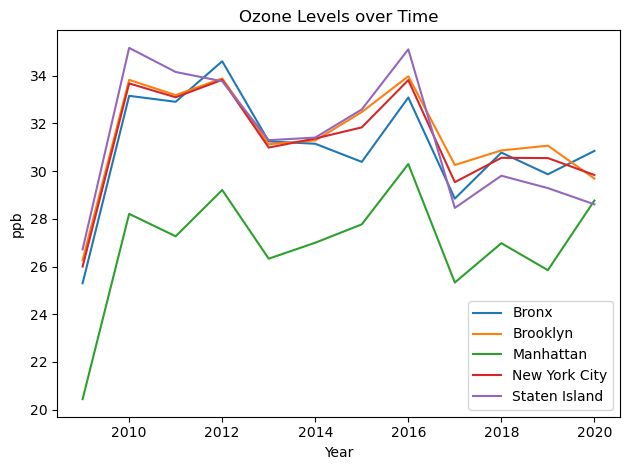

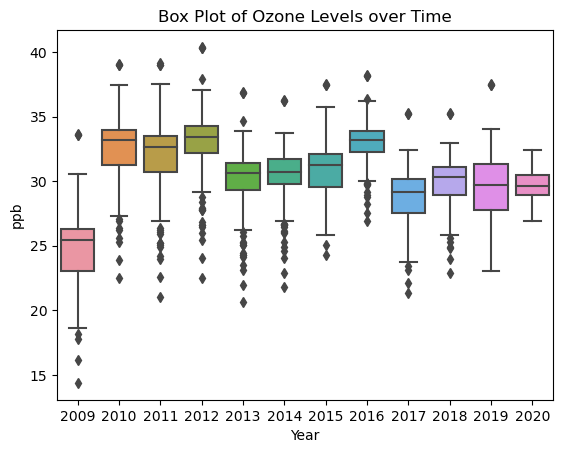

In [306]:
places = ['New York City', 'Bronx', 'Brooklyn', 'Manhattan', 'Staten Island']
place_plots = O3[O3["Geo Place Name"].isin(places)]
place_plots.set_index('Year', inplace=True)
place_plots = place_plots.sort_values('Year')
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.ylabel('ppb')
plt.title('Ozone Levels over Time')  
plt.tight_layout()
plt.show()

sns.boxplot(x='Year', y='Data Value', data=O3)
plt.ylabel('ppb')
plt.title("Box Plot of Ozone Levels over Time")
plt.show()

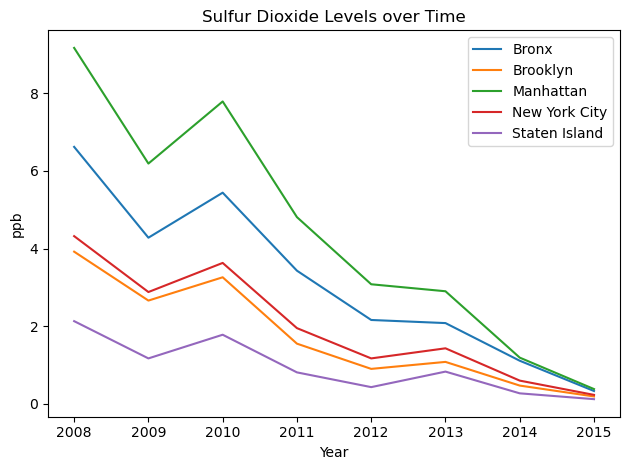

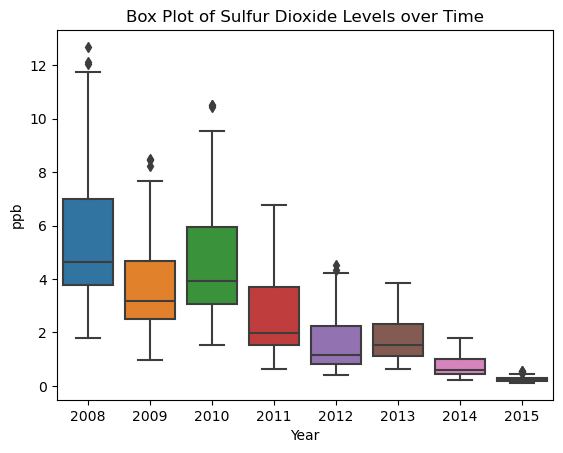

In [307]:
place_plots = SO2[SO2["Geo Place Name"].isin(places)]
place_plots.set_index('Year', inplace=True)
place_plots = place_plots.sort_values('Year')
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.ylabel('ppb')
plt.title('Sulfur Dioxide Levels over Time')  
plt.tight_layout()
plt.show()

sns.boxplot(x='Year', y='Data Value', data=SO2)
plt.ylabel('ppb')
plt.title("Box Plot of Sulfur Dioxide Levels over Time")
plt.show()

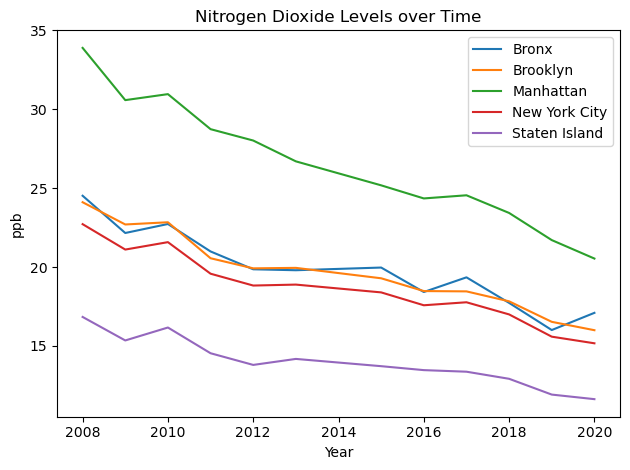

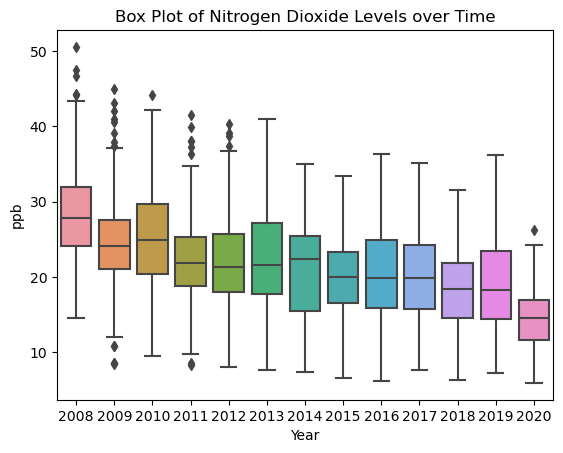

In [308]:
NO2_annual = NO2[NO2["Time Period"].str.contains("Annual")]
place_plots = NO2_annual[NO2_annual["Geo Place Name"].isin(places)]
place_plots.set_index('Year', inplace=True)
place_plots = place_plots.sort_values('Year')
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.ylabel('ppb')
plt.title('Nitrogen Dioxide Levels over Time')
plt.tight_layout()
plt.show()

sns.boxplot(x='Year', y='Data Value', data=NO2)
plt.ylabel('ppb')
plt.title("Box Plot of Nitrogen Dioxide Levels over Time")
plt.show()

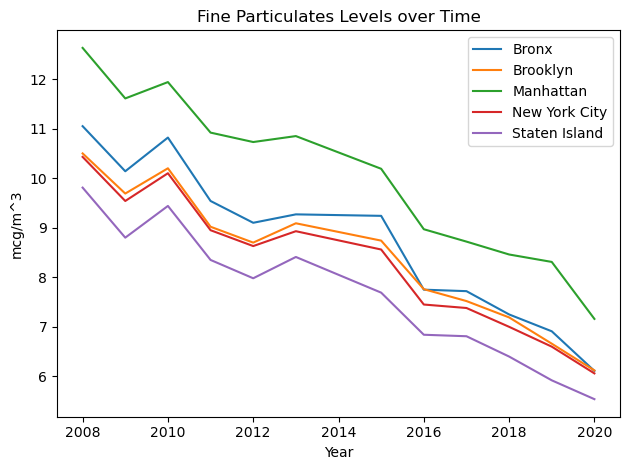

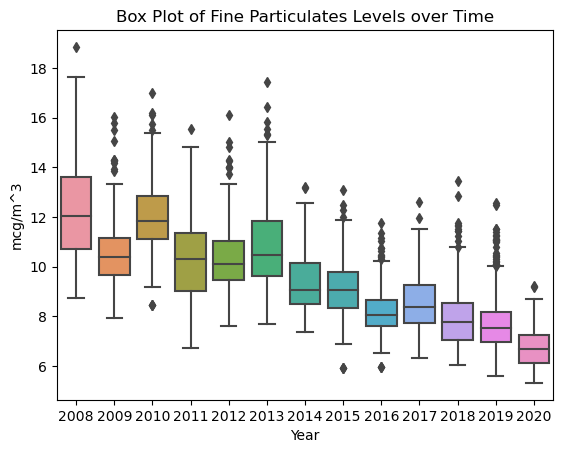

In [309]:
PM2_annual = PM2[PM2["Time Period"].str.contains("Annual")]
place_plots = PM2_annual[PM2_annual["Geo Place Name"].isin(places)]
place_plots.set_index('Year', inplace=True)
place_plots = place_plots.sort_values('Year')
place_plots.groupby("Geo Place Name")['Data Value'].plot(legend= True)

# Setting up labels and titles
plt.ylabel('mcg/m^3')
plt.title('Fine Particulates Levels over Time')  
plt.tight_layout()
plt.show()

sns.boxplot(x='Year', y='Data Value', data=PM2)
plt.ylabel('mcg/m^3')
plt.title("Box Plot of Fine Particulates Levels over Time")
plt.show()

It seems that other than Ozone, there is a clear trend of pollutants reducing over time. But this data only goes until 2019 (with the excpetion of SO2), so it would be useful to predict if this trend would stay in the future. This is where the Modeling and Machine Learning process can become important but more to that later. 

For now, even though we visualized the averages of the whole city, it is hard to tell where the worst is. And also how much has this impacted the people living there.

Let's begin by seeing the different levels of pollutants throughout the different neighborhoods. We can accomplish this using Folium, a Python library for creating interactive maps, which will allow us to see the levels of pollutants in each neighborhood and how they vary across the city.

To start and simplify things lets make two functions. The first determines the color of a marker with red being the worst levels, yellow is in the middle and green as the best in the city. The second function does the actual mapping by taking a data frame of a type of pollutant and marking their amounts in the different neighborhoods, using the color_producer to help visualize the severity.

In [310]:
def color_producer(ammount, min, max):
    temp = (max-min)/3
    if max-temp < ammount <= max :
        return 'red'
    elif max-(2*temp) < ammount <= max-temp :
        return 'yellow'
    elif min <= ammount <= max-(2*temp):
        return 'green'
    else:
        return 'gray'

def map_maker (df, min, max):
    nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
    
    # Add markers for each location
    for index, row in df.iterrows():
        lat = row['Lat']
        lon = row['Long']
        name = row['Geo Place Name']
        folium.CircleMarker(
            location=[lat, lon], 
            radius=7,
            fill = True,
            fill_opacity = 0.5,
            color = color_producer(row['Data Value'],min, max),
            opacity = 0.4,
            popup=name
        ).add_to(nyc_map)
    return nyc_map

Now all that is left is to use the most recent data and plot each pollutant on the map of NYC.

In [416]:
O3_CD = O3[O3['Time Period'] == 'Summer 2019']
map_maker(O3_CD, min(O3_CD['Data Value']), max(O3_CD['Data Value']))

In [417]:
SO2_CD = SO2[SO2['Time Period'] == 'Winter 2015-16']
map_maker(SO2_CD, min(SO2_CD['Data Value']), max(SO2_CD['Data Value']))

In [418]:
NO2_CD = NO2[NO2['Time Period'] == 'Annual Average 2019']
map_maker(NO2_CD, min(NO2_CD['Data Value']), max(NO2_CD['Data Value']))

In [419]:
PM2_CD = PM2[PM2['Time Period'] == 'Annual Average 2019']
map_maker(PM2_CD, min(PM2_CD['Data Value']), max(PM2_CD['Data Value']))

Interesting. Observe how the Ozone levels are the most severe outside of the middle of the city compared to the other pollutants who are the most severe in the middle. It might be interesting to research more about Ozone and sources that could contribute to its increase compared to other pollutants. 

Ozone (O3) and PM2.5 are two of the most commonly monitored air pollutants, and they are known to be harmful to human health. Since we have the data for asthma emergency visits due to Ozone and PM2.5, lets visualize the two to see if we can confirm a relationship between the ozone levels and asthma.

Similar to plotting the ozone levels and PM2 levels over time, let's do the same for asthma hospitalizations. Let's create a function that helps avoid repeating code but also plot this.

In [368]:
def plot_asthma (df, title):
    asthma = df.copy()
    asthma.rename(columns={'Data Value': 'Emergency Visits'}, inplace = True)

    asthma_adults = asthma[asthma['Measure'] == 'Estimated Annual Rate- 18 Yrs and Older']
    asthma_child = asthma[asthma['Measure'] == 'Estimated Annual Rate- Children 0 to 17 Yrs Old']

    place_plots = asthma_adults[asthma_adults["Geo Place Name"].isin(places)]
    place_plots.set_index('Year', inplace=True)
    place_plots = place_plots.sort_values('Year')
    place_plots.groupby("Geo Place Name")['Emergency Visits'].plot(legend= True)

    plt.ylabel('Asthma Hospitalizations')
    plt.title('Asthma Hospitalizations of Adults by Ozone in NYC (2005-2015)')
    plt.show()

    place_plots = asthma_child[asthma_child["Geo Place Name"].isin(places)]
    place_plots.set_index('Year', inplace=True)
    place_plots = place_plots.sort_values('Year')
    place_plots.groupby("Geo Place Name")['Emergency Visits'].plot(legend= True)

    plt.ylabel('Asthma Hospitalizations')
    plt.title(title)
    plt.show()

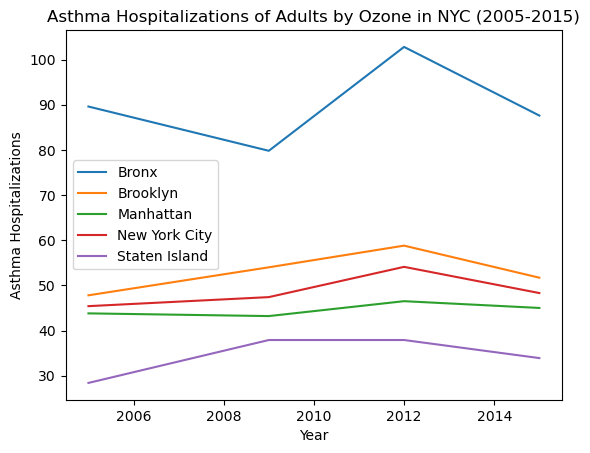

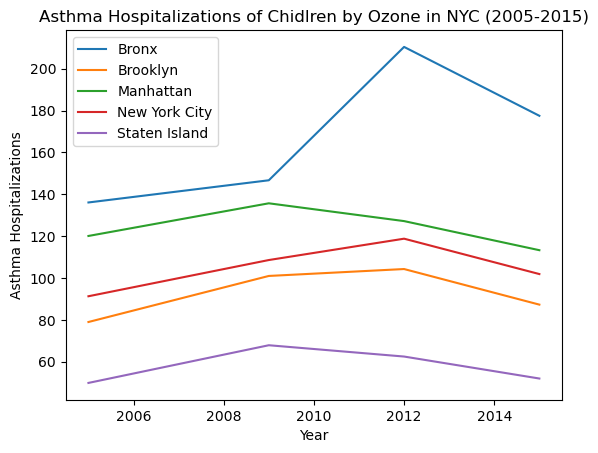

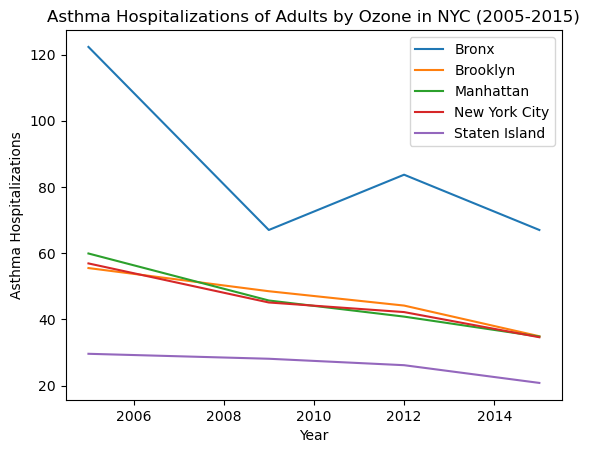

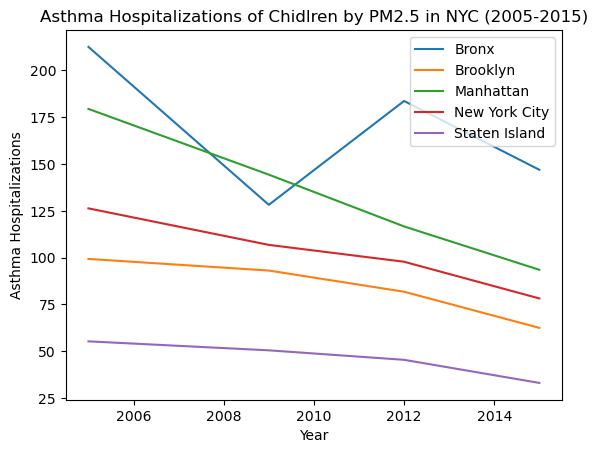

In [369]:
plot_asthma(O3_asthma, 'Asthma Hospitalizations of Chidlren by Ozone in NYC (2005-2015)')
plot_asthma(PM2_asthma, 'Asthma Hospitalizations of Chidlren by PM2.5 in NYC (2005-2015)')

Let us also make a scatter plot plotting each neighborhood and its ozone level and asthma hospitalization.

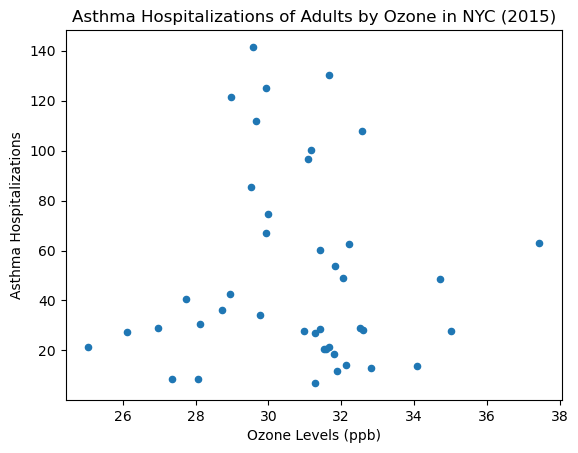

In [413]:
years = [2015]
df = O3[O3['Geo Type Name'] == 'UHF42']
df = df[df["Year"].isin(years)]

asthma_adults = O3_asthma[O3_asthma['Measure'] == 'Estimated Annual Rate- 18 Yrs and Older']
df2 = asthma_adults[asthma_adults['Geo Type Name'] == 'UHF42']
df2 = df2[df2["Year"].isin(years)]

df = df.sort_values('Geo Place Name')
df = df.reset_index(drop=True)
df = df.drop(["Time Period", 'Geo Type Name', 'Unique ID', 'Lat', 'Long', 'Year'], axis=1)
df.rename(columns={'Data Value': 'Levels'}, inplace = True)

df2 = df2.sort_values('Geo Place Name')
df2 = df2.reset_index(drop=True)
df2 = df2.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name', 'Time Period',
                'Geo Type Name', 'Unique ID', 'Year'], axis=1)
df2.rename(columns={'Data Value': 'Asthma Hospitalizations'}, inplace = True)

O3_joined = df.merge(df2, on=['Geo Join ID', 'Geo Place Name'])
O3_joined.plot.scatter('Levels', 'Asthma Hospitalizations')

plt.xlabel('Ozone Levels (ppb)')
plt.ylabel('Asthma Hospitalizations')
plt.title('Asthma Hospitalizations of Adults by Ozone in NYC (2015)')
plt.show()

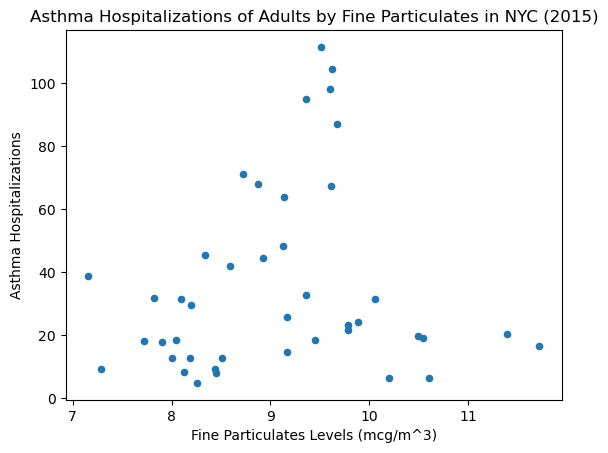

In [414]:
years = [2015]
df = PM2[PM2['Geo Type Name'] == 'UHF42']
df = df[df["Time Period"].str.contains("Annual")]
df = df[df["Year"].isin(years)]

asthma_adults = PM2_asthma[PM2_asthma['Measure'] == 'Estimated Annual Rate- 18 Yrs and Older']
df2 = asthma_adults[asthma_adults['Geo Type Name'] == 'UHF42']
df2 = df2[df2["Year"].isin(years)]

df = df.sort_values('Geo Place Name')
df = df.reset_index(drop=True)
df = df.drop(["Time Period", 'Geo Type Name', 'Unique ID', 'Lat', 'Long', 'Year'], axis=1)
df.rename(columns={'Data Value': 'Levels'}, inplace = True)

df2 = df2.sort_values('Geo Place Name')
df2 = df2.reset_index(drop=True)
df2 = df2.drop(['Measure', 'Measure Info', 'Indicator ID', 'Name', 'Time Period',
                'Geo Type Name', 'Unique ID', 'Year'], axis=1)
df2.rename(columns={'Data Value': 'Asthma Hospitalizations'}, inplace = True)

PM2_joined = df.merge(df2, on=['Geo Join ID', 'Geo Place Name'])
PM2_joined.plot.scatter('Levels', 'Asthma Hospitalizations')

plt.xlabel('Fine Particulates Levels (mcg/m^3)')
plt.ylabel('Asthma Hospitalizations')
plt.title('Asthma Hospitalizations of Adults by Fine Particulates in NYC (2015)')
plt.show()

## Model: Analysis, Hypothesis Testing, & ML
The modeling step is a crucial component of the data science lifecycle. Once the data has been collected, cleaned, and preprocessed, the next step is to create a model that can be used to make predictions or gain a better understanding of the underlying relationships between variables.

While the data that we have so far is good, it does not help to determine how severe the issue is today as it only goes until 2020. Let's create predictive model to predict the air quality today and future years.

In [256]:
def runML(X, Y, xlabel, ylabel, title):
    # split the data into training/testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    # create linear regression object
    model = linear_model.LinearRegression()

    # train the model using the training sets
    model.fit(X_train, Y_train)

    # make predictions using the testing set
    Y_pred = model.predict(X_test)

    print('Ordinary Least Squares (OLS)')
    print('Coefficients: ', model.coef_[0])
    print('Intercept: ', model.intercept_)
    print('Mean squared error: %.2f'
          % mean_squared_error(Y_test, Y_pred))
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))

    plt.scatter(X, Y,  color='black')
    plt.plot(X_test, Y_pred, color='blue', linewidth=3)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [259]:
def runMLRANSAC(X, Y, xlabel, ylabel, title, num):
     # Robustly fit linear model with RANSAC algorithm
    ransac = linear_model.RANSACRegressor()
    ransac.fit(X, Y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)

    Xin = X[inlier_mask]
    Yin = Y[inlier_mask]

    # split the data into training/testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(Xin, Yin, test_size=0.2)

    # create linear regression object
    model = linear_model.LinearRegression()

    # train the model using the training sets
    model.fit(X_train, Y_train)

    # make predictions using the testing set
    Y_pred = model.predict(X_test)

    score = r2_score(Y_test, Y_pred)
    if ((score < 0.95 or score > 1) and num < 250):
        runMLRANSAC(X, Y, xlabel, ylabel, title, num+1)
    else: 
        print('RANSAC')
        print('Coefficients: ', model.coef_[0])
        print('Intercept: ', model.intercept_)
        print('Mean squared error: %.2f'
              % mean_squared_error(Y_test, Y_pred))
        print('Coefficient of determination: %.2f'
              % r2_score(Y_test, Y_pred))

        plt.scatter(X[inlier_mask], Y[inlier_mask], color='green', marker='.', s=200,
                    label='Inliers')
        plt.scatter(X[outlier_mask], Y[outlier_mask], color='red', marker='.', s=200,
                    label='Outliers')
        plt.plot(X_test, Y_pred, color='blue', linewidth=3, label='Line of Best Fit')

        plt.legend(loc='lower right')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

Ordinary Least Squares (OLS)
Coefficients:  [0.00744859]
Intercept:  [15.43417649]
Mean squared error: 10.60
Coefficient of determination: -0.00


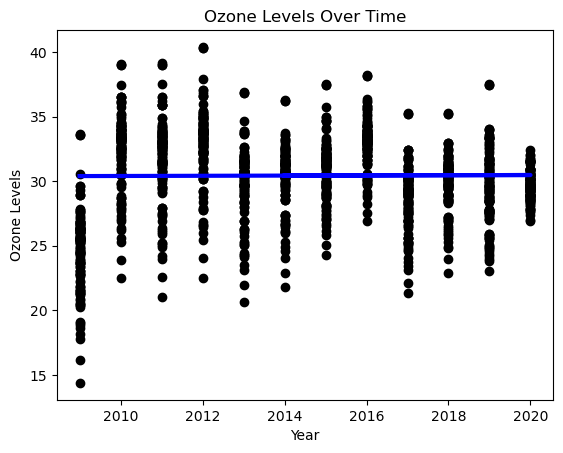

RANSAC
Coefficients:  [-0.31925795]
Intercept:  [675.25539473]
Mean squared error: 1.03
Coefficient of determination: 0.56


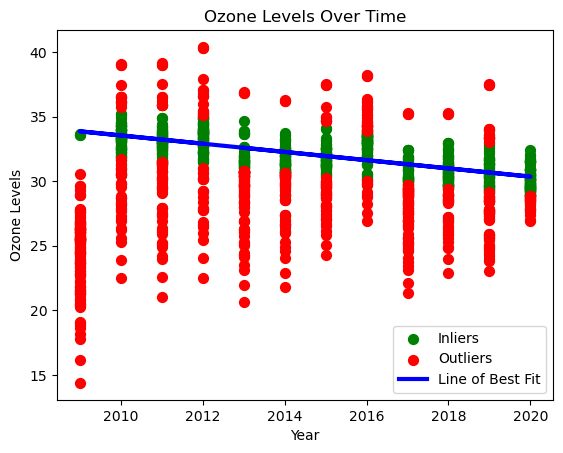

In [320]:
pollutant = O3[~O3['Year'].isin(places)].copy()
X = pollutant[['Year']]
Y = pollutant[['Data Value']]

runML(X, Y, 'Year', 'Ozone Levels', 'Ozone Levels Over Time')
runMLRANSAC(X, Y, 'Year', 'Ozone Levels', 'Ozone Levels Over Time', 0)

## Interpretation: Insight & Policy Decision
